## Question 1 : Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/X.npy -O X.npy
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/y.npy -O y.npy

In [ ]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"

  # Write your code here ----------
  X=np.load(path_X)
  y=np.load(path_y)

  # -------------------------------

  return X, y

In [ ]:
def get_linear_model(X, y):
  # This shoudl return a proper linear model without bias of type y = XW

  # Write your code here ----------
  out_shape=1
  D=len(X[0])
  
  W = np.random.randn(D, out_shape)

  
  # -------------------------------
  return W

In [ ]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y


  # Write your code here ----------
  error=0
  n=len(y)
  for i in range(0,n):
    error+=(y[i]-y_pred[i])*(y[i]-y_pred[i])
  
  # -------------------------------

  return error

In [ ]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0

  # Write your code here ----------
  a=np.matmul(X.T,X);
  ainverse=np.linalg.inv(a)
  b=np.matmul(X.T,y)
  W=np.dot(ainverse,b)
  
  # -------------------------------

  return W

In [ ]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  # Write your code here ----------
   W=np.random.randn(len(X[0]),1)
   y_pred=np.dot(X,W)
   error_hist=[]
   error=MSE(y,y_pred)
   for i in range(0,epochs):
     error_hist.append(error)
     dw=np.matmul(X.T,np.dot(X,W)-y)
     W-=lr*dw
     y_pred=np.dot(X,W)
     error=MSE(y,y_pred)

   
  
  # -------------------------------

   return W,error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

In [ ]:
# Write your code here ----------
X,y=load_data_LR()
W,error_hist=train_by_GD(X,y,5,0.01)
y_pred=np.dot(X,W)
error=MSE(y,y_pred)


  
# -------------------------------

##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

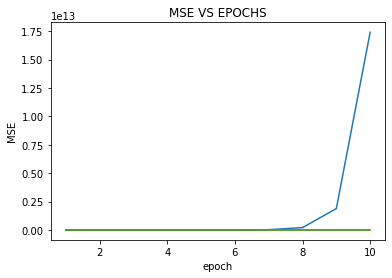

In [ ]:
# Write your code here ----------
X,y=load_data_LR()
lr = [0.01, 0.001, 0.0001]
for i in lr:
  W,mse=train_by_GD(X, y, epochs=10, lr=i)
  epochs=np.arange(1,11)
  plt.title("MSE VS EPOCHS")
  plt.xlabel("epoch")
  plt.ylabel("MSE")
  plt.plot(epochs,mse)
  plt.show
  
  
# -------------------------------

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [ ]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------
  (x_train, y_train), (x_test,y_test)=tf.keras.datasets.cifar10.load_data()

  # -------------------------------

  return x_train, y_train, x_test, y_test

### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [ ]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(7200, activation='relu', input_shape=(32, 32, 3)))

  model.add(tf.keras.layers.Dense(2304, activation='relu', input_shape=(32, 32, 3)))

  model.add(tf.keras.layers.Dense(1024, activation='relu', input_shape=(32, 32, 3)))

  model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(32, 32, 3)))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(10))



  # -------------------------------

  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [ ]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10))

  # -------------------------------

    return model

### Compile and train the fully connected neural network model using the above functions.

In [ ]:
# Write your code here ----------
x_train, y_train, x_test, y_test=load_data_cifar10_norm()
x_train=x_train/255.0
y_train=y_train/255.0
x_test=x_test/255.0
y_test=y_test/255.0

model=build_fc_model(input_shape=(32, 32, 3), num_class=10)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### Compile and train the CNN model using the above functions.

In [ ]:
# Write your code here ----------
x_train, y_train, x_test, y_test=load_data_cifar10_norm()
x_train=x_train/255.0
y_train=y_train/255.0
x_test=x_test/255.0
y_test=y_test/255.0
model=build_cnn_model(input_shape=(32, 32, 3), num_class=10)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [ ]:
print("Replace this with your observation")